In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from statsmodels.stats.multitest import multipletests

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
ex1_22 = pd.read_csv('../data/2023_paper2_raw/Exp_1_2022.csv')
ex2_22 = pd.read_csv('../data/2023_paper2_raw/Exp_2_2022.csv')
ex3_22 = pd.read_csv('../data/2023_paper2_raw/Exp_3_2022.csv')

In [66]:
ex1_23 = pd.read_csv('../data/2023_FISH_VNIIPRH - EXPERIMENT_1_DATE.csv')
ex2_23 = pd.read_csv('../data/2023_FISH_VNIIPRH - EXP_2.csv')
ex4_23 = pd.read_csv('../data/2023_FISH_VNIIPRH - EXP_4_butterfly.csv')
ex6_23 = pd.read_csv('../data/2023_paper2_raw/EXP_6_freeze_sperm_2023.csv')

## 2022

### Experiment 1 2022

In [6]:
ex1_22

,number,temp(celsius),time(minute),total,alive,dead,abnormal,%,Unnamed: 8,Температура_время
0,5,30,10,53,44,0,9,"0,830189","0,8517723333",30_10
1,6,30,10,39,34,0,5,"0,871795",NaN,NaN
2,7,30,10,75,64,0,11,"0,853333",NaN,NaN
3,8,30,15,80,69,1,10,"0,8625","0,837094",30_15
4,9,30,15,74,59,0,15,"0,797297",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58,63,20,0,108,86,3,19,"0,796296",NaN,NaN
59,64,20,0,81,63,1,17,"0,777778",NaN,NaN
60,65,20,0,73,52,13,8,"0,712329",NaN,NaN
61,66,20,0,65,55,2,8,"0,846154",NaN,NaN


In [7]:
ex1_22['feltilized'] = ex1_22['total'] - ex1_22['dead']

In [8]:
ex1_22['fert_rate'] = (ex1_22['feltilized']/ex1_22['total'])*100

In [9]:
ex1_22['hatching_rate'] = (ex1_22['alive']/ex1_22['feltilized'])*100

In [10]:
ex1_22['regime'] = ex1_22['temp(celsius)'].astype('str') + '_' + ex1_22['time(minute)'].astype('str')

Text(0, 0.5, 'Fertilized rate')

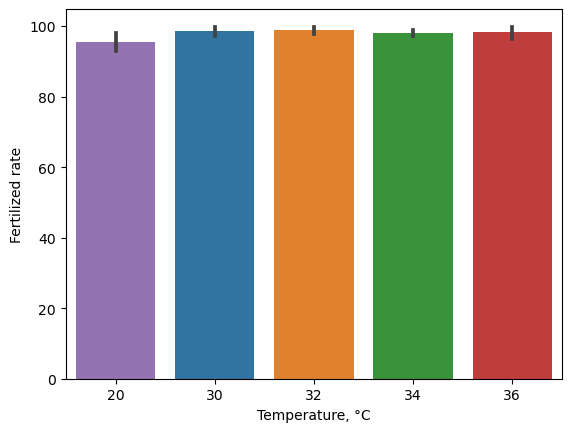

In [11]:
g=sns.barplot(ex1_22.sort_values(by='temp(celsius)'), 
            x='temp(celsius)', 
            y='fert_rate', 
            hue=ex1_22['temp(celsius)'].astype('str'),
            dodge=False)

g.get_legend().set_visible(False)
plt.xlabel('Temperature, °C')
plt.ylabel('Fertilized rate')

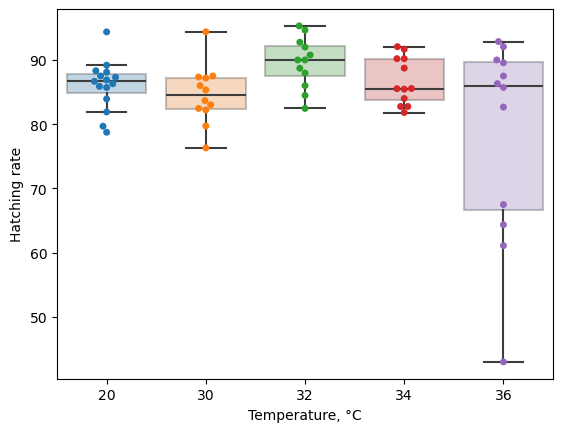

In [12]:
g=sns.boxplot(ex1_22, 
            x='temp(celsius)', 
            y='hatching_rate', 
            hue=ex1_22['temp(celsius)'],
            dodge=False,boxprops=dict(alpha=.3), showfliers=False,)

g=sns.swarmplot(ex1_22, 
            x='temp(celsius)', 
            y='hatching_rate', 
            hue=ex1_22['temp(celsius)'].astype('str'),
            dodge=False)

g.get_legend().set_visible(False)
plt.xlabel('Temperature, °C')
plt.ylabel('Hatching rate')
plt.savefig('ex1_22_hatching_rate.png')

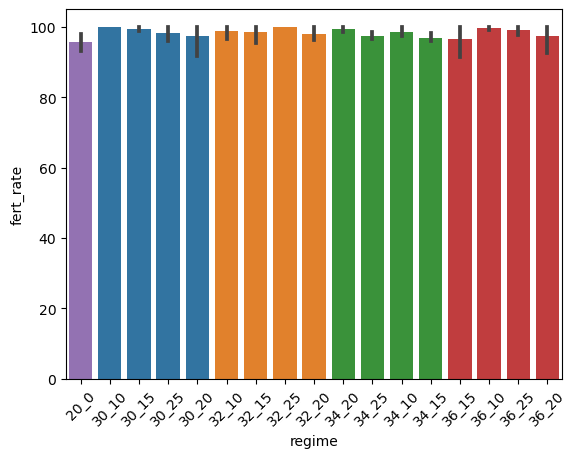

In [13]:
g=sns.barplot(ex1_22.sort_values(by='temp(celsius)'), 
              x='regime', 
              y='fert_rate', 
              hue=ex1_22['temp(celsius)'].astype('str'), 
              dodge=False)

plt.xticks(rotation=45)
g.get_legend().set_visible(False)

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


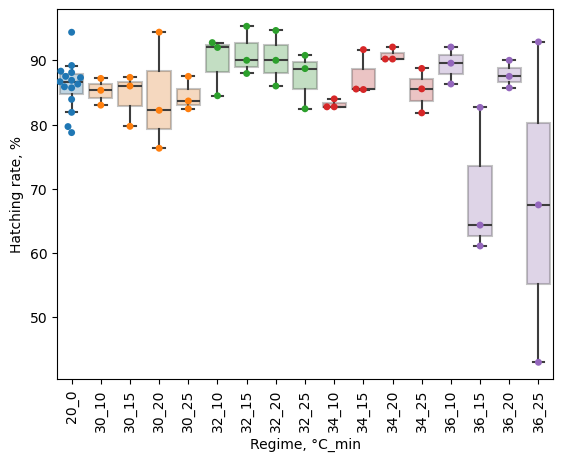

In [14]:
g=sns.boxplot(ex1_22.sort_values(by='temp(celsius)'), 
              x='regime', 
              y='hatching_rate', boxprops=dict(alpha=.3), showfliers=False,
              hue='temp(celsius)', 
              dodge=False,
              order=['20_0', '30_10', '30_15', '30_20', '30_25', '32_10', '32_15', '32_20',
       '32_25', '34_10', '34_15', '34_20', '34_25', '36_10', '36_15',
       '36_20', '36_25'])

g=sns.swarmplot(ex1_22.sort_values(by='temp(celsius)'), 
              x='regime', 
              y='hatching_rate', 
              hue=ex1_22['temp(celsius)'].astype('str'), hue_order=['20', '30', '32', '34', '36'],
              dodge=False,
              order=['20_0', '30_10', '30_15', '30_20', '30_25', '32_10', '32_15', '32_20',
       '32_25', '34_10', '34_15', '34_20', '34_25', '36_10', '36_15',
       '36_20', '36_25'])

plt.xticks(rotation=90)
g.get_legend().set_visible(False)
plt.xlabel('Regime, °C_min')
plt.ylabel('Hatching rate, %')
plt.show()

In [15]:
ex1_22.regime.unique()

array(['30_10', '30_15', '30_20', '30_25', '32_10', '32_15', '32_20',
       '32_25', '34_10', '34_15', '34_20', '34_25', '36_10', '36_15',
       '36_20', '36_25', '20_0'], dtype=object)

In [16]:
# sns.displot(ex1_22[ex1_22['temp(celsius)'] == 20]['fertilized_rate'])

In [17]:
ex1_hatching_lst = []
for regime in ex1_22['regime'].unique():
    ex1_hatching_lst.append(ex1_22[(ex1_22['regime'] == regime)]['hatching_rate'].tolist())

In [18]:
len(ex1_hatching_lst)

17

In [19]:
pvals = []
for lst in ex1_hatching_lst:
    pvals.append(scipy.stats.mannwhitneyu(lst, ex1_hatching_lst[-1])[1])

In [20]:
pvals

[0.49754901960784315,
 0.6544117647058824,
 0.6544117647058824,
 0.5144526269147639,
 0.3014705882352941,
 0.0392156862745098,
 0.16421568627450983,
 0.4264705882352941,
 0.1549184514050921,
 1.0,
 0.024316704934105263,
 0.7377450980392157,
 0.16421568627450983,
 0.01715686274509804,
 0.47674140339702786,
 0.3602941176470588,
 1.0]

In [21]:
multipletests(pvals, method='bonferroni', alpha=0.05)[-1]

0.0029411764705882353

In [22]:
for i in pvals:
    if i < multipletests(pvals, method='bonferroni', alpha=0.05)[-1]:
        print(i)
    else:
        print('the results are not statistically significant')

the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
the results are not statistically significant


In [23]:
ex1_22['temp(celsius)'].unique()

array([30, 32, 34, 36, 20], dtype=int64)

In [24]:
scipy.stats.f_oneway(ex1_22[ex1_22['temp(celsius)'] == 20]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 30]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 32]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 34]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 36]['hatching_rate'])

F_onewayResult(statistic=3.3374996203125393, pvalue=0.0158100070642653)

In [25]:
print(scipy.stats.tukey_hsd(ex1_22[ex1_22['temp(celsius)'] == 20]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 30]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 32]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 34]['hatching_rate'],
                    ex1_22[ex1_22['temp(celsius)'] == 36]['hatching_rate']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      1.436     0.989    -7.024     9.897
 (0 - 2)     -3.556     0.761   -12.016     4.904
 (0 - 3)     -0.695     0.999    -9.155     7.766
 (0 - 4)      7.478     0.107    -0.982    15.939
 (1 - 0)     -1.436     0.989    -9.897     7.024
 (1 - 2)     -4.992     0.518   -13.910     3.926
 (1 - 3)     -2.131     0.961   -11.049     6.787
 (1 - 4)      6.042     0.325    -2.876    14.960
 (2 - 0)      3.556     0.761    -4.904    12.016
 (2 - 1)      4.992     0.518    -3.926    13.910
 (2 - 3)      2.861     0.895    -6.057    11.779
 (2 - 4)     11.034     0.008     2.116    19.952
 (3 - 0)      0.695     0.999    -7.766     9.155
 (3 - 1)      2.131     0.961    -6.787    11.049
 (3 - 2)     -2.861     0.895   -11.779     6.057
 (3 - 4)      8.173     0.087    -0.745    17.091
 (4 - 0)     -7.478     0.107   -15.939     0.982
 (4 - 1)     -6.042     0.325   

In [26]:
# scipy.stats.kruskal(ex1_22[ex1_22['regime'] == '20_0']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_25']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_25']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_25']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_25']['hatching_rate'])

In [27]:
# print(scipy.stats.tukey_hsd(ex1_22[ex1_22['regime'] == '20_0']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '30_25']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '32_25']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '34_25']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_10']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_15']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_20']['hatching_rate'],
#                      ex1_22[ex1_22['regime'] == '36_25']['hatching_rate']))

### Experiment 2 2022

In [28]:
ex2_22

,Petri,Family,Mode,Female,Male,dead,alive,total,fertilized_per,hatched,hatched_per,swimming,hatched_family,swim_per_family,hatched_per_family
0,1,1х1,Control,1,1,"8,00","62,00","70,00","88,57","62,00","100,00","112,00",122,"91,80327869","55,50"
1,2,1х1,Control,1,1,"14,00","10,00","24,00","41,67","4,00","40,00","112,00",122,"91,80327869","55,50"
2,3,1х1,Control,1,1,"22,00","3,00","25,00","12,00","1,00","33,33","112,00",122,"91,80327869","55,50"
3,4,1х1,Control,1,1,"14,00","37,00","51,00","72,55","18,00","48,65","112,00",122,"91,80327869","55,50"
4,5,1х2,Control,1,2,"7,00","21,00","28,00","75,00","20,00","95,24","112,00",122,"91,80327869","60,36"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,284,2х1,40_60_enu,2,1,"3,00","137,00","140,00","97,86","0,00","0,00","0,00",0,#DIV/0!,"0,00"
284,285,2х2,40_60_enu,2,2,"8,00","247,00","255,00","96,86","0,00","0,00","0,00",0,#DIV/0!,"0,00"
285,286,2х2,40_60_enu,2,2,"7,00","133,00","140,00","95,00","0,00","0,00","0,00",0,#DIV/0!,"0,00"
286,287,2х2,40_60_enu,2,2,"4,00","105,00","109,00","96,33","0,00","0,00","0,00",0,#DIV/0!,"0,00"


In [29]:
for col in ['dead', 'alive', 'total', 
            'fertilized_per', 'hatched', 'hatched_per', 
            'swimming']:
    ex2_22[col] = ex2_22[col].str.replace(',', '.')
    ex2_22[col] = ex2_22[col].astype('float')

In [30]:
ex2_22['fert_rate'] = (ex2_22['alive']/ex2_22['total'])*100

In [31]:
ex2_22['hatching_rate'] = (ex2_22['hatched']/ex2_22['alive'])*100

In [32]:
ex2_22['ENU'] = ex2_22['Mode'].str.split('_').str[-1].str.lower() 

In [33]:
ex2_22['regime'] = ex2_22['Mode'].str.split('_').str[:2].apply(lambda x: '_'.join(x))

In [34]:
ex2_22.loc[range(16,32), 'regime'] = ex2_22[ex2_22['Mode'].str.startswith('Control_')]['Mode'].str[:7]

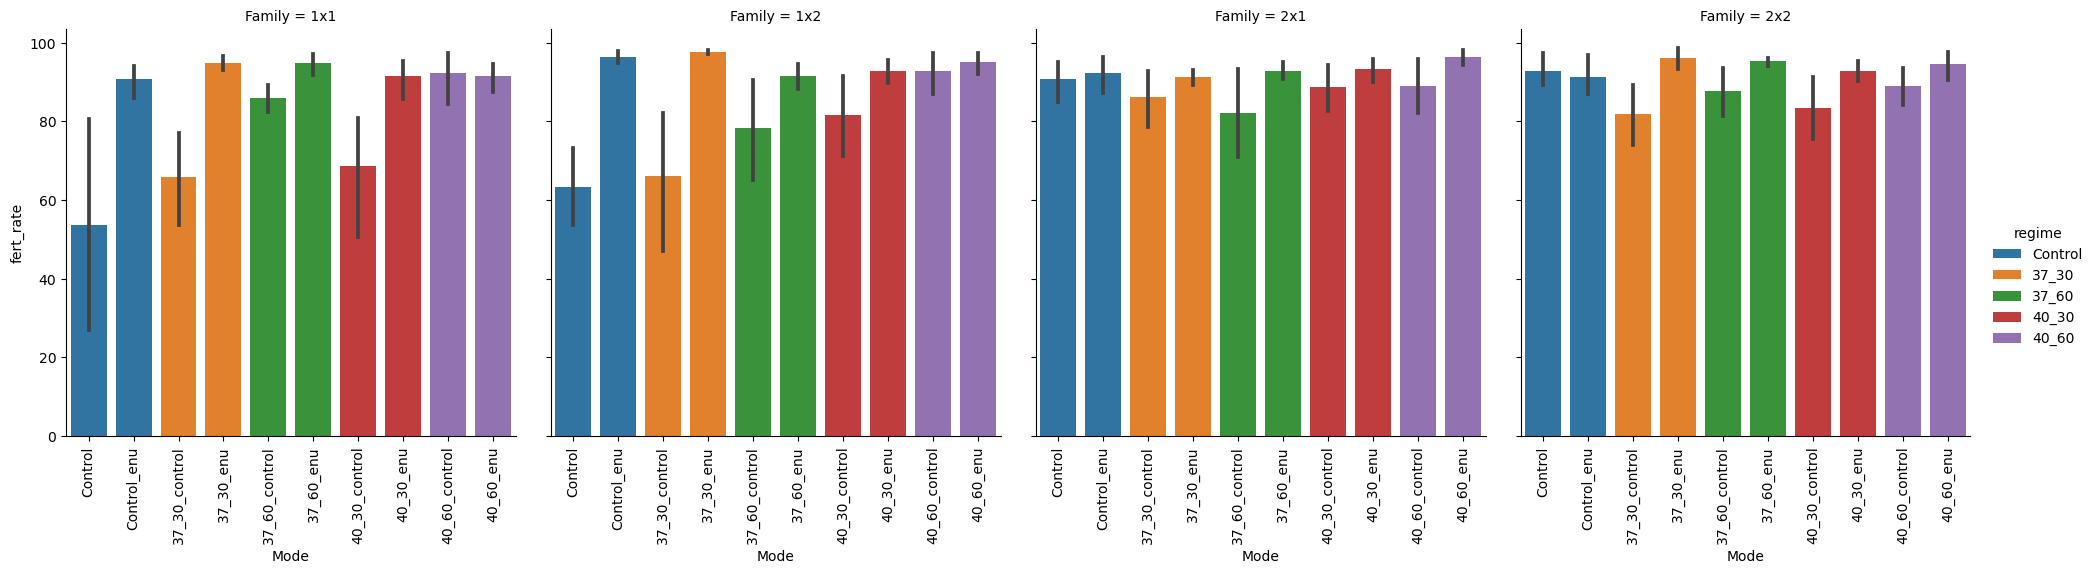

In [35]:
g = sns.catplot(ex2_22, kind='bar', 
                x='Mode', 
                y='fert_rate', 
                col='Family', 
                hue='regime', 
                dodge=False, 
                order=['Control', 'Control_enu', '37_30_control', '37_30_enu', '37_60_control', 
                       '37_60_enu', '40_30_control', '40_30_enu', '40_60_control', '40_60_enu'])
g.set_xticklabels(rotation=90)

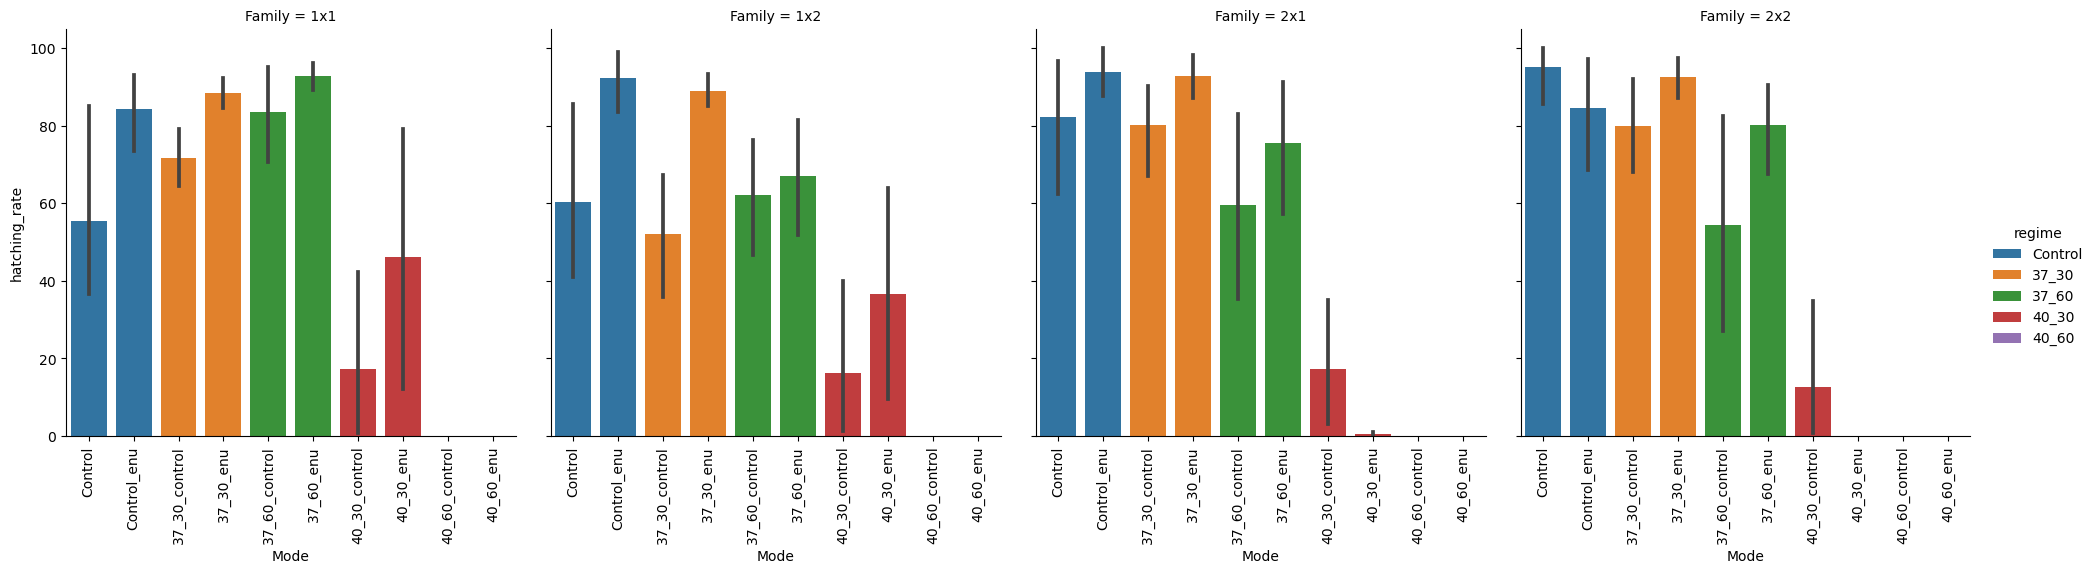

In [36]:
g = sns.catplot(ex2_22, kind='bar', 
                x='Mode', 
                y='hatching_rate', 
                col='Family', 
                hue='regime', 
                dodge=False, 
                order=['Control', 'Control_enu', '37_30_control', '37_30_enu', '37_60_control', 
                       '37_60_enu', '40_30_control', '40_30_enu', '40_60_control', '40_60_enu'])
g.set_xticklabels(rotation=90)

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


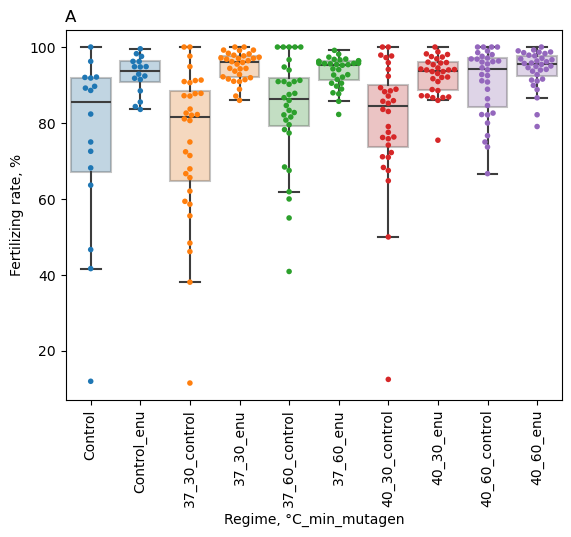

In [37]:
g = sns.boxplot(ex2_22, 
            x='Mode', 
            y='fert_rate', 
            hue='regime',
            dodge=False,  boxprops=dict(alpha=.3), showfliers=False,
            order=['Control', 'Control_enu', '37_30_control', '37_30_enu', '37_60_control', 
                       '37_60_enu', '40_30_control', '40_30_enu', '40_60_control', '40_60_enu'])
g = sns.swarmplot(ex2_22, 
            x='Mode', 
            y='fert_rate', 
            hue='regime',
            dodge=False, size=4,
            order=['Control', 'Control_enu', '37_30_control', '37_30_enu', '37_60_control', 
                       '37_60_enu', '40_30_control', '40_30_enu', '40_60_control', '40_60_enu'])

plt.xticks(rotation=90)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.get_legend().set_visible(False)
plt.ylabel('Fertilizing rate, %')
plt.xlabel('Regime, °C_min_mutagen')
g.set_title('A', x=0.01, y=1)

plt.savefig('ex2_22_fert_rate.png')

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


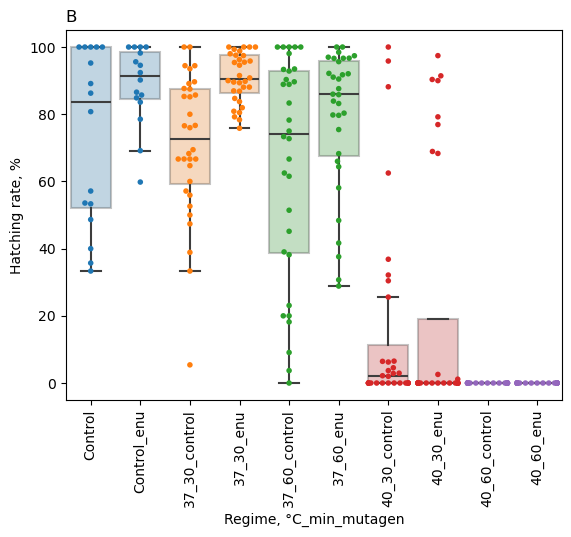

In [38]:
g = sns.boxplot(ex2_22, 
            x='Mode', 
            y='hatching_rate', 
            hue='regime',
            dodge=False,  boxprops=dict(alpha=.3), showfliers=False,
            order=['Control', 'Control_enu', '37_30_control', '37_30_enu', '37_60_control', 
                       '37_60_enu', '40_30_control', '40_30_enu', '40_60_control', '40_60_enu'])
g = sns.swarmplot(ex2_22, 
            x='Mode', 
            y='hatching_rate', 
            hue='regime',
            dodge=False, size=4,
            order=['Control', 'Control_enu', '37_30_control', '37_30_enu', '37_60_control', 
                       '37_60_enu', '40_30_control', '40_30_enu', '40_60_control', '40_60_enu'])

plt.xticks(rotation=90)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.get_legend().set_visible(False)
plt.ylabel('Hatching rate, %')
plt.xlabel('Regime, °C_min_mutagen')
g.set_title('B', x=0.01, y=1)

plt.savefig('ex2_22_hatching_rate.png')

In [39]:
ex2_22[ex2_22['Mode'] == '40_30_control']['hatching_rate'].median()

2.0869565217391304

In [40]:
ex2_22[ex2_22['Mode'] == '40_30_enu']['hatching_rate'].median()

0.0

In [41]:
# g = sns.FacetGrid(ex2_22, col='')

In [42]:
# ex2_22[['Mode', 'hatching_rate', 'regime', 'ENU']]

In [43]:
ex2_22[ex2_22['ENU'] == 'control']['Mode'].unique()

array(['Control', '37_30_control', '37_60_control', '40_30_control',
       '40_60_control'], dtype=object)

In [44]:
ex2_22[ex2_22['ENU'] == 'enu']['Mode'].unique()

array(['Control_enu', '37_30_enu', '37_60_enu', '40_30_enu', '40_60_enu'],
      dtype=object)

In [45]:
ex2_22_hatching_lst_c = []
ex2_22_hatching_lst_enu = []

for mode in ex2_22['Mode'].unique():
    ex2_22_hatching_lst_c.append(ex2_22[(ex2_22['Mode'] == mode) & (ex2_22['ENU'] == 'control')]['hatching_rate'].tolist())
    ex2_22_hatching_lst_enu.append(ex2_22[(ex2_22['Mode'] == mode) & (ex2_22['ENU'] == 'enu')]['hatching_rate'].tolist())

ex2_22_hatching_lst_c = [x for x in ex2_22_hatching_lst_c if x != []]
ex2_22_hatching_lst_enu = [x for x in ex2_22_hatching_lst_enu if x != []]

In [46]:
ex2_22_pvals_c = []
for lst in ex2_22_hatching_lst_c:
    ex2_22_pvals_c.append(scipy.stats.mannwhitneyu(lst, ex2_22_hatching_lst_c[0])[1])

In [47]:
ex2_22_pvals_enu = []
for lst in ex2_22_hatching_lst_enu:
    ex2_22_pvals_enu.append(scipy.stats.mannwhitneyu(lst, ex2_22_hatching_lst_enu[0])[1])

In [48]:
multipletests(ex2_22_pvals_c, method='bonferroni', alpha=0.05)[-1]

0.01

In [49]:
multipletests(ex2_22_pvals_enu, method='bonferroni', alpha=0.05)[-1]

0.01

In [50]:
for i in ex2_22_pvals_c:
    if i < multipletests(ex2_22_pvals_c, method='bonferroni', alpha=0.05)[-1]:
        print(i)
    else:
        print('the results are not statistically significant')

the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
2.185176436970002e-06
2.6358968101566744e-11


In [51]:
for i in ex2_22_pvals_enu:
    if i < multipletests(ex2_22_pvals_enu, method='bonferroni', alpha=0.05)[-1]:
        print(i)
    else:
        print('the results are not statistically significant')

the results are not statistically significant
the results are not statistically significant
the results are not statistically significant
7.980660040300828e-07
2.6824691910555783e-11


### Experiment 3 2022

In [52]:
ex3_22.columns

Index(['Unnamed: 0', 'конц', 'Мертвые, шт', 'Живые, шт', 'Всего, шт',
       '% оплод', 'Личинки, шт', '% выклева', 'Всего личинки, шт',
       'Вставшей на плав, шт', '% плавающих от выклюнувшихся',
       'Всего оплодотворенных, шт', '% плав от оплодотв',
       '% выклева от средней контроля'],
      dtype='object')

In [53]:
ex3_22 = ex3_22.rename(columns={'конц':'ENU_mM', 'Мертвые, шт':'dead', 'Живые, шт':'fertilized', 'Всего, шт':'total', 'Личинки, шт':'hatched'})

In [54]:
ex3_22

,Unnamed: 0,ENU_mM,dead,fertilized,total,% оплод,hatched,% выклева,"Всего личинки, шт","Вставшей на плав, шт",% плавающих от выклюнувшихся,"Всего оплодотворенных, шт",% плав от оплодотв,% выклева от средней контроля
0,1,0,4,36,40,90,31,"86,11",282.0,272.0,NaN,360.0,"75,56","109,22"
1,2,0,4,61,65,"93,85",46,"75,41",NaN,NaN,NaN,NaN,NaN,"95,65"
2,3,0,4,73,77,"94,81",77,"97,26",NaN,NaN,NaN,NaN,NaN,"123,36"
3,4,0,3,54,57,"94,74",48,"88,89",NaN,NaN,NaN,NaN,NaN,"112,75"
4,5,0,4,65,69,"94,2",33,"50,77",NaN,NaN,NaN,NaN,NaN,"64,4"
5,6,0,3,71,74,"95,95",53,"74,65",NaN,NaN,NaN,NaN,NaN,"94,68"
6,7,1,3,37,40,"92,5",30,"81,08",223.0,193.0,"16,59192825",354.0,"54,52","102,84"
7,8,1,26,79,105,"75,24",51,"64,56",NaN,NaN,NaN,NaN,NaN,"81,88"
8,9,1,8,63,71,"88,73",37,"58,73",NaN,NaN,NaN,NaN,NaN,"74,49"
9,10,1,18,61,79,"77,22",36,"59,02",NaN,NaN,NaN,NaN,NaN,"74,86"


In [55]:
ex3_22.loc[2, 'hatched'] = 73

In [56]:
ex3_22['hatching_rate'] = (ex3_22['hatched']/ex3_22['fertilized'])*100

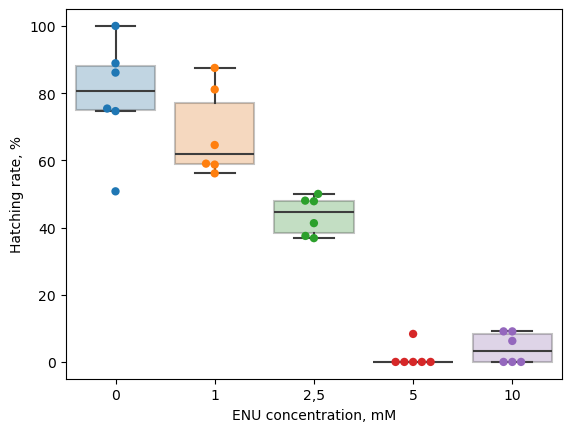

In [57]:
g = sns.boxplot(ex3_22, 
            x='ENU_mM', 
            y='hatching_rate', 
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,)
g = sns.swarmplot(ex3_22, 
            x='ENU_mM', 
            y='hatching_rate',
            hue='ENU_mM',
            size=6, dodge=False)

g.get_legend().set_visible(False)
plt.xlabel('ENU concentration, mM')
plt.ylabel('Hatching rate, %')
plt.savefig('ex3_22_hatching_rate.png')

In [58]:
ex3_22['ENU_mM'].unique()

array(['0', '1', '2,5', '5', '10'], dtype=object)

In [59]:
ex3_22_hatching_lst = []
for conc in ex3_22['ENU_mM'].unique():
    ex3_22_hatching_lst.append(ex3_22[(ex3_22['ENU_mM'] == conc)]['hatching_rate'].tolist())

In [60]:
ex3_22_pvals = []
for lst in ex3_22_hatching_lst:
    ex3_22_pvals.append(scipy.stats.mannwhitneyu(lst, ex3_22_hatching_lst[0])[1])

In [61]:
for i in ex3_22_pvals:
    if i < multipletests(ex3_22_pvals, method='bonferroni', alpha=0.05)[-1]:
        print(i)
    else:
        print('the results are not statistically significant')

the results are not statistically significant
the results are not statistically significant
0.0021645021645021645
0.0036645475900385395
0.00469769748933007


In [62]:
scipy.stats.f_oneway(ex3_22[ex3_22['ENU_mM'] == '0']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '1']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '2,5']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '5']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '10']['hatching_rate'])

F_onewayResult(statistic=73.2271300799478, pvalue=1.9632414264515995e-13)

In [63]:
print(scipy.stats.tukey_hsd(ex3_22[ex3_22['ENU_mM'] == '0']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '1']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '2,5']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '5']['hatching_rate'],
                    ex3_22[ex3_22['ENU_mM'] == '10']['hatching_rate']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     11.470     0.323    -5.880    28.820
 (0 - 2)     35.726     0.000    18.376    53.075
 (0 - 3)     77.916     0.000    60.566    95.265
 (0 - 4)     75.233     0.000    57.883    92.582
 (1 - 0)    -11.470     0.323   -28.820     5.880
 (1 - 2)     24.256     0.003     6.906    41.605
 (1 - 3)     66.446     0.000    49.096    83.795
 (1 - 4)     63.763     0.000    46.413    81.112
 (2 - 0)    -35.726     0.000   -53.075   -18.376
 (2 - 1)    -24.256     0.003   -41.605    -6.906
 (2 - 3)     42.190     0.000    24.840    59.540
 (2 - 4)     39.507     0.000    22.157    56.857
 (3 - 0)    -77.916     0.000   -95.265   -60.566
 (3 - 1)    -66.446     0.000   -83.795   -49.096
 (3 - 2)    -42.190     0.000   -59.540   -24.840
 (3 - 4)     -2.683     0.991   -20.033    14.667
 (4 - 0)    -75.233     0.000   -92.582   -57.883
 (4 - 1)    -63.763     0.000   

## 2023

### Experiment 1, 2 2023

In [7]:
ex1_23

,№,CODE,KIND,MUT,STAGE,TEMP,TIME,DEAD,FERT,TOTAL,...,AVG_S_CONTROL,CODE.1,Unnamed: 24,SHOCK_DEAD,SHOCK_ALIVE,SHOCK_TOTAL,FERT_NAME,LARVAE_ALIVE,SHOCK_NAME,LARVAE_NAME
0,1,RMV35601,R,M,V,35,60,3,27,30,...,"93,69167781",RMV35601,NaN,0.0,30,30,Dima,28,Vika,Sasha
1,2,RMV35602,R,M,V,35,60,11,67,78,...,NaN,RMV35602,NaN,2.0,65,67,Dima,49,Vika,Sasha
2,3,RMV35603,R,M,V,35,60,5,70,75,...,NaN,RMV35603,NaN,1.0,63,64,Dima,55,Vika,Sasha
3,4,RMV35604,R,M,V,35,60,8,21,29,...,NaN,RMV35604,NaN,0.0,18,18,Dima,15,Vika,Sasha
4,5,RMV35605,R,M,V,35,60,2,20,22,...,NaN,RMV35605,NaN,1.0,9,10,Dima,17,Vika,Sasha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,SCPC1,S,C,P,20,0,0,24,24,...,NaN,SCPC1,NaN,0.0,24,24,Polina,23,Vika,Lera
196,197,SCPC2,S,C,P,20,0,0,12,12,...,NaN,SCPC2,NaN,0.0,12,12,Polina,12,Vika,Lera
197,198,SCPC3,S,C,P,20,0,0,26,26,...,NaN,SCPC3,NaN,0.0,26,26,Polina,26,Vika,Lera
198,199,SCPC4,S,C,P,20,0,3,62,65,...,NaN,SCPC4,NaN,0.0,62,62,Polina,61,Vika,Lera


In [8]:
ex1_23.loc[4, 'SHOCK'] = 19

In [9]:
ex1_23.loc[26, 'HATCHED'] = 19
ex1_23.loc[29, 'HATCHED'] = 11
ex1_23.loc[50, 'HATCHED'] = 32
ex1_23.loc[67, 'HATCHED'] = 5
ex1_23.loc[72, 'HATCHED'] = 52
ex1_23.loc[107, 'HATCHED'] = 15
ex1_23.loc[125, 'HATCHED'] = 19
ex1_23.loc[139, 'HATCHED'] = 4
ex1_23.loc[154, 'HATCHED'] = 63
ex1_23.loc[199, 'HATCHED'] = 28
ex1_23.loc[67, 'HATCHED'] = 4

In [10]:
ex1_23.columns

Index(['№', 'CODE', 'KIND', 'MUT', 'STAGE', 'TEMP', 'TIME', 'DEAD', 'FERT',
       'TOTAL', 'SHOCK', 'HATCHED', 'SWIM', 'D/U', 'FERTILIZE_PERC',
       'AVG_MUT_FERT', 'AVG_CONTROL_FERT', 'AVG_R_FERT', 'AVG_S_FERT',
       'AVG_R_MUT', 'AVG_R_CONTROL', 'AVG_S_MUT', 'AVG_S_CONTROL', 'CODE.1',
       'Unnamed: 24', 'SHOCK_DEAD', 'SHOCK_ALIVE', 'SHOCK_TOTAL', 'FERT_NAME',
       'LARVAE_ALIVE', 'SHOCK_NAME', 'LARVAE_NAME'],
      dtype='object')

In [11]:
ex1_23['kind_mode'] = ex1_23['CODE'].str[1:-1]

In [12]:
ex1_23['mode'] = ex1_23['TEMP'].astype('str') + '_' + ex1_23['TIME'].astype('str') + '_' + ex1_23['MUT']

In [13]:
ex1_23['hatching_rate'] =( ex1_23['HATCHED']/ex1_23['SHOCK'])*100
ex1_23['hatching_rate'] = ex1_23['hatching_rate'].fillna(0)

In [14]:
ex1_23['regime'] = ex1_23['TEMP'].astype('str') + '_' + ex1_23['TIME'].astype('str')

In [15]:
ex1_23['mode'].unique()

array(['35_60_M', '35_120_M', '38_40_M', '38_60_M', '20_0_M', '37_180_M',
       '37_120_M', '35_60_C', '35_120_C', '38_40_C', '38_60_C', '20_0_C',
       '37_180_C', '37_120_C'], dtype=object)

#### Razbrosanniy and SHIELDED

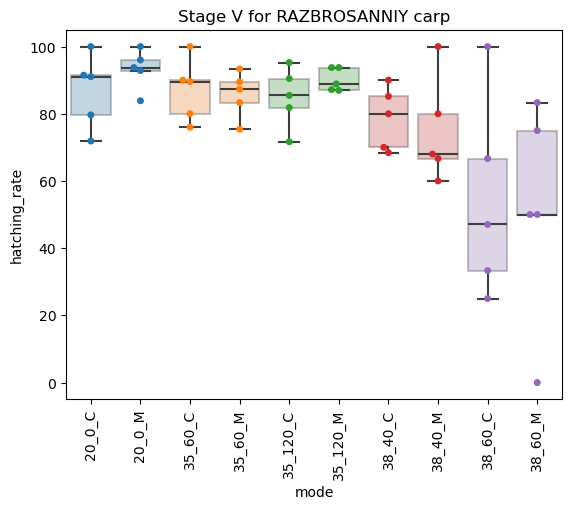

In [16]:
g = sns.boxplot(ex1_23[(ex1_23['KIND'] == 'R') & (ex1_23['STAGE'] == 'V')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '35_60', '35_120', '38_40', '38_60'], 
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['20_0_C', '20_0_M', '35_60_C', '35_60_M', '35_120_C', 
                        '35_120_M', '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g = sns.swarmplot(ex1_23[(ex1_23['KIND'] == 'R') & (ex1_23['STAGE'] == 'V')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '35_60', '35_120', '38_40', '38_60'],
            dodge=False, size=5,
            order=['20_0_C', '20_0_M', '35_60_C', '35_60_M', '35_120_C', 
                        '35_120_M', '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g.get_legend().set_visible(False)
g.set(title='Stage V for RAZBROSANNIY carp')
plt.xticks(rotation=90)
plt.show()

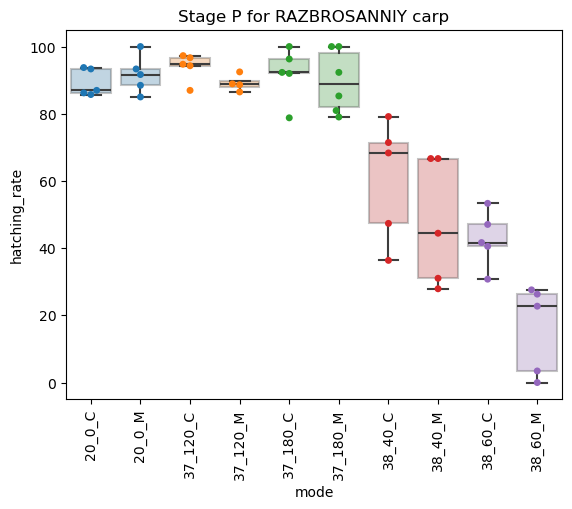

In [17]:
g = sns.boxplot(ex1_23[(ex1_23['KIND'] == 'R') & (ex1_23['STAGE'] == 'P')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '37_120', '37_180', '38_40', '38_60'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['20_0_C', '20_0_M', '37_120_C', '37_120_M', '37_180_C', '37_180_M', 
                   '38_40_C', '38_40_M', '38_60_C', '38_60_M'])
g = sns.swarmplot(ex1_23[(ex1_23['KIND'] == 'R') & (ex1_23['STAGE'] == 'P')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '37_120', '37_180', '38_40', '38_60'],
            dodge=False, size=5,
            order=['20_0_C', '20_0_M', '37_120_C', '37_120_M', '37_180_C', '37_180_M', 
                   '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g.get_legend().set_visible(False)
g.set(title='Stage P for RAZBROSANNIY carp')
plt.xticks(rotation=90)
plt.show()

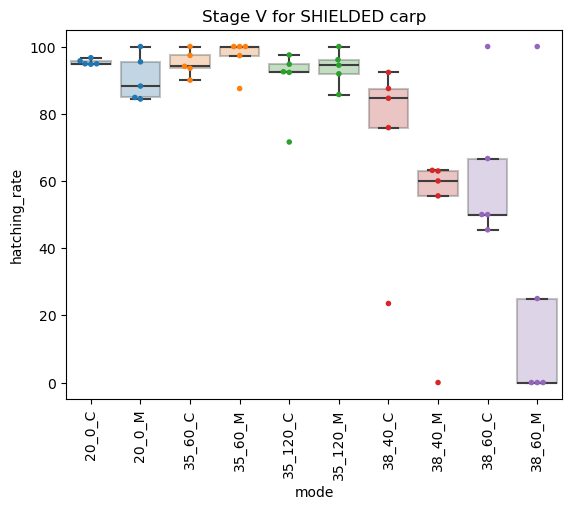

In [18]:
g = sns.boxplot(ex1_23[(ex1_23['KIND'] == 'S') & (ex1_23['STAGE'] == 'V')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '35_60', '35_120', '38_40', '38_60'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['20_0_C', '20_0_M', '35_60_C', '35_60_M', '35_120_C', 
                        '35_120_M', '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g = sns.swarmplot(ex1_23[(ex1_23['KIND'] == 'S') & (ex1_23['STAGE'] == 'V')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '35_60', '35_120', '38_40', '38_60'],
            dodge=False, size=4,
            order=['20_0_C', '20_0_M', '35_60_C', '35_60_M', '35_120_C', 
                        '35_120_M', '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g.get_legend().set_visible(False)
g.set(title='Stage V for SHIELDED carp')
plt.xticks(rotation=90)
plt.show()

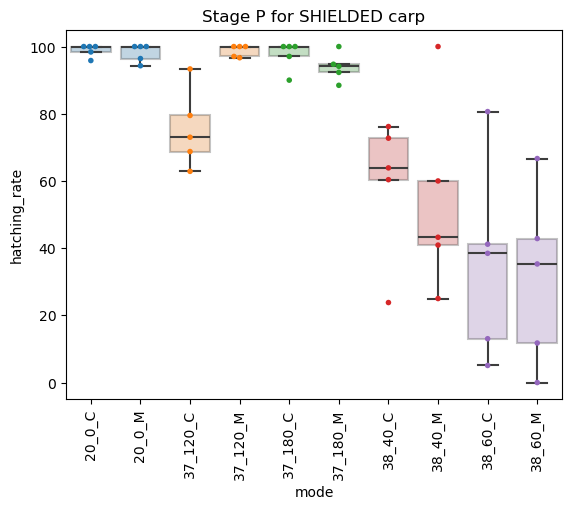

In [19]:
g = sns.boxplot(ex1_23[(ex1_23['KIND'] == 'S') & (ex1_23['STAGE'] == 'P')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '37_120', '37_180', '38_40', '38_60'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['20_0_C', '20_0_M', '37_120_C', '37_120_M', '37_180_C', '37_180_M', 
                   '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g = sns.swarmplot(ex1_23[(ex1_23['KIND'] == 'S') & (ex1_23['STAGE'] == 'P')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '37_120', '37_180', '38_40', '38_60'],
            dodge=False, size=4,
            order=['20_0_C', '20_0_M', '37_120_C', '37_120_M', '37_180_C', '37_180_M', 
                   '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g.get_legend().set_visible(False)
g.set(title='Stage P for SHIELDED carp')
plt.xticks(rotation=90)
plt.show()

#### Both carp

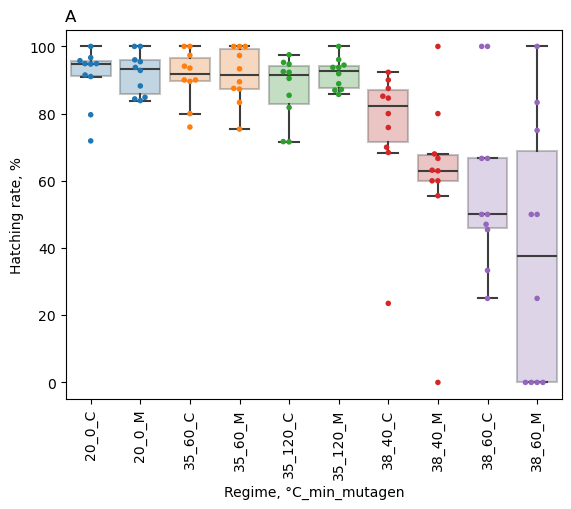

<Figure size 640x480 with 0 Axes>

In [24]:
g = sns.boxplot(ex1_23[(ex1_23['STAGE'] == 'V')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '35_60', '35_120', '38_40', '38_60'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['20_0_C', '20_0_M', '35_60_C', '35_60_M', '35_120_C', 
                        '35_120_M', '38_40_C', '38_40_M', '38_60_C', '38_60_M'])
g = sns.swarmplot(ex1_23[(ex1_23['STAGE'] == 'V')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '35_60', '35_120', '38_40', '38_60'],
            size=4, dodge=False,
            order=['20_0_C', '20_0_M', '35_60_C', '35_60_M', '35_120_C', 
                        '35_120_M', '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g.get_legend().set_visible(False)
g.set_title('A', x=0.01, y=1)
plt.xticks(rotation=90)
plt.xlabel('Regime, °C_min_mutagen')
plt.ylabel('Hatching rate, %')
plt.show()
plt.savefig('../figures/2023_plots_paper2/ex1_23_hatching_rate_both_V.png')

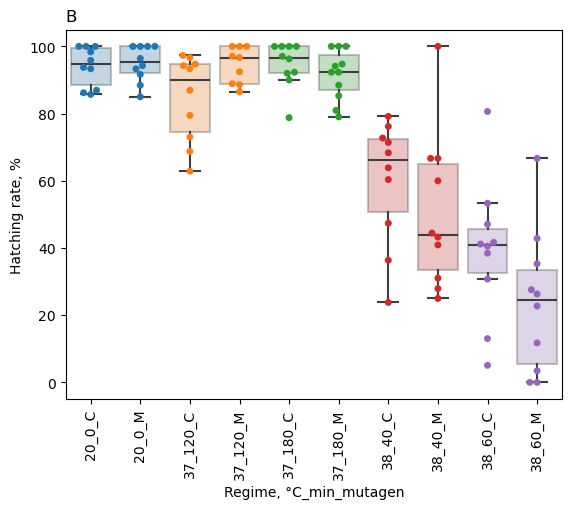

<Figure size 640x480 with 0 Axes>

In [25]:
g = sns.boxplot(ex1_23[(ex1_23['STAGE'] == 'P')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '37_120', '37_180', '38_40', '38_60'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['20_0_C', '20_0_M', '37_120_C', '37_120_M', '37_180_C', '37_180_M', 
                   '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g = sns.swarmplot(ex1_23[(ex1_23['STAGE'] == 'P')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['20_0', '37_120', '37_180', '38_40', '38_60'],
            dodge=False,
            order=['20_0_C', '20_0_M', '37_120_C', '37_120_M', '37_180_C', '37_180_M', 
                   '38_40_C', '38_40_M', '38_60_C', '38_60_M'])

g.get_legend().set_visible(False)
g.set_title('B', x=0.01, y=1)
plt.xticks(rotation=90)
plt.xlabel('Regime, °C_min_mutagen')
plt.ylabel('Hatching rate, %')
plt.show()
plt.savefig('../figures/2023_plots_paper2/ex1_23_hatching_rate_both_P.png')

In [26]:
ex1_23VChatching_lst = []
ex1_23PChatching_lst = []

ex1_23VMhatching_lst = []
ex1_23PMhatching_lst = []


for mode in ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'C')]['mode'].unique():
    ex1_23VChatching_lst.append(ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'C') & (ex1_23['mode'] == mode)]
                                ['hatching_rate'].tolist())
for mode in ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'C')]['mode'].unique():
    ex1_23PChatching_lst.append(ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'C') & (ex1_23['mode'] == mode)]
                                ['hatching_rate'].tolist())
for mode in ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'M')]['mode'].unique():    
    ex1_23VMhatching_lst.append(ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'M') & (ex1_23['mode'] == mode)]
                                ['hatching_rate'].tolist())
for mode in ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'M')]['mode'].unique():    
    ex1_23PMhatching_lst.append(ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'M') & (ex1_23['mode'] == mode)]
                                ['hatching_rate'].tolist())

# ex1_23VChatching_lst = [x for x in ex1_23VChatching_lst if x != []]
# ex1_23PChatching_lst = [x for x in ex1_23PChatching_lst if x != []]
# ex1_23VMhatching_lst = [x for x in ex1_23VMhatching_lst if x != []]
# ex1_23PMhatching_lst = [x for x in ex1_23PMhatching_lst if x != []]

In [27]:
pvalsVC23 = []
pvalsPC23 = []
pvalsVM23 = []
pvalsPM23 = []

for lst in ex1_23VChatching_lst:
    pvalsVC23.append(scipy.stats.mannwhitneyu(lst, ex1_23VChatching_lst[-1])[1])
for lst in ex1_23PChatching_lst:
    pvalsPC23.append(scipy.stats.mannwhitneyu(lst, ex1_23PChatching_lst[-1])[1]) 
for lst in ex1_23VMhatching_lst:
    pvalsVM23.append(scipy.stats.mannwhitneyu(lst, ex1_23VMhatching_lst[-1])[1])
for lst in ex1_23PMhatching_lst:
    pvalsPM23.append(scipy.stats.mannwhitneyu(lst, ex1_23PMhatching_lst[-1])[1])

In [28]:
def show_stat_results(pvals, mode):
    for i, j in zip(pvals, mode):
        if i < multipletests(pvals, method='bonferroni', alpha=0.05)[-1]:
            print(j, i)
        else:
            print(j, 'the results are not statistically significant')

In [29]:
print('VC\n', ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'C')]['mode'].unique(), 
      '\n', pvalsVC23, '\nalpha =', multipletests(pvalsVC23, method='bonferroni', alpha=0.05)[-1], '\n____',
     '\nPC\n', ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'C')]['mode'].unique(), 
      '\n', pvalsPC23, '\nalpha =', multipletests(pvalsPC23, method='bonferroni', alpha=0.05)[-1], '\n____',
     '\nVM\n', ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'M')]['mode'].unique(), 
      '\n', pvalsVM23, '\nalpha =', multipletests(pvalsVM23, method='bonferroni', alpha=0.05)[-1], '\n____',
     '\nPM\n', ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'M')]['mode'].unique(), 
      '\n', pvalsPM23, '\nalpha =', multipletests(pvalsPM23, method='bonferroni', alpha=0.05)[-1], '\n____')

VC
 ['35_60_C' '35_120_C' '38_40_C' '38_60_C' '20_0_C'] 
 [0.7331503112076126, 0.2564813665273773, 0.00908242666764077, 0.020795618549324543, 1.0] 
alpha = 0.01 
____ 
PC
 ['37_180_C' '37_120_C' '38_40_C' '38_60_C' '20_0_C'] 
 [0.7281677610833472, 0.10332875818721182, 0.00017861448837368162, 0.00017861448837368162, 1.0] 
alpha = 0.01 
____ 
VM
 ['35_60_M' '35_120_M' '38_40_M' '38_60_M' '20_0_M'] 
 [1.0, 0.9697589326664142, 0.0021601407222153076, 0.0020774980052304308, 1.0] 
alpha = 0.01 
____ 
PM
 ['37_180_M' '37_120_M' '38_40_M' '38_60_M' '20_0_M'] 
 [0.350730224342913, 0.9666054676449933, 0.001565986809310313, 0.00017167508717120289, 1.0] 
alpha = 0.01 
____


In [30]:
print('VC')
show_stat_results(pvalsVC23, ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'C')]['mode'].unique())

VC
35_60_C the results are not statistically significant
35_120_C the results are not statistically significant
38_40_C 0.00908242666764077
38_60_C the results are not statistically significant
20_0_C the results are not statistically significant


In [31]:
print('PC')
show_stat_results(pvalsPC23, ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'C')]['mode'].unique())

PC
37_180_C the results are not statistically significant
37_120_C the results are not statistically significant
38_40_C 0.00017861448837368162
38_60_C 0.00017861448837368162
20_0_C the results are not statistically significant


In [32]:
print('VM')
show_stat_results(pvalsVM23, ex1_23[(ex1_23['STAGE'] == 'V') & (ex1_23['MUT'] == 'M')]['mode'].unique())

VM
35_60_M the results are not statistically significant
35_120_M the results are not statistically significant
38_40_M 0.0021601407222153076
38_60_M 0.0020774980052304308
20_0_M the results are not statistically significant


In [33]:
print('PM')
show_stat_results(pvalsPM23, ex1_23[(ex1_23['STAGE'] == 'P') & (ex1_23['MUT'] == 'M')]['mode'].unique())

PM
37_180_M the results are not statistically significant
37_120_M the results are not statistically significant
38_40_M 0.001565986809310313
38_60_M 0.00017167508717120289
20_0_M the results are not statistically significant


In [34]:
ex2_23

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,STAGE,TEMP,TIME,DEAD,...,24_SHOCK_NAME,48_SHOCK_DEAD,48_SHOCK_NAME,HATCHED,HATCHED_NAME,24_HATCHED_DEAD,24_HATCHED_NAME,SWIM_DEAD,SWIM_NAME,SWIM
0,1,11CG37120,1,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,11СG37120,2,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,11СG37120,3,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,11СG37120,4,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,12СG37120,1,1,2,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,220,21MV3830,4,2,1,M,V,38,30.0,18.0,...,Alya,NaN,NaN,8.0,Sasha,3.0,Alya,2.0,Alya,3
220,221,22MV3830,1,2,2,M,V,38,30.0,16.0,...,Alya,NaN,NaN,6.0,Vika,NaN,NaN,5.0,Vika,1
221,222,22MV3830,2,2,2,M,V,38,30.0,30.0,...,Alya,NaN,NaN,10.0,Vika,NaN,NaN,10.0,Vika,0
222,223,22MV3830,3,2,2,M,V,38,30.0,32.0,...,Alya,NaN,NaN,8.0,Vika,1.0,Alya,6.0,Vika,1


In [35]:
ex2_23.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'FEMALE', 'MALE', 'MUT', 'STAGE', 'TEMP',
       'TIME', 'DEAD', 'FERT', 'FERT_NAME', 'TOTAL', 'SHOCK_DEAD',
       'SHOCK_ALIVE', 'SHOCK_NAME', '24_SHOCK_DEAD', '24_SHOCK_ALIVE',
       '24_SHOCK_NAME', '48_SHOCK_DEAD', '48_SHOCK_NAME', 'HATCHED',
       'HATCHED_NAME', '24_HATCHED_DEAD', '24_HATCHED_NAME', 'SWIM_DEAD',
       'SWIM_NAME', 'SWIM'],
      dtype='object')

In [36]:
ex2_23['TIME'] = ex2_23['TIME'].fillna(0)

In [37]:
ex2_23['TIME'] = ex2_23['TIME'].astype('int')

In [38]:
ex2_23['mode'] = ex2_23['TEMP'].astype('str') + '_' + ex2_23['TIME'].astype('str') + '_' + ex2_23['MUT']

In [39]:
ex2_23['regime'] = ex2_23['TEMP'].astype('str') + '_' + ex2_23['TIME'].astype('str')

In [40]:
ex2_23['HATCHED'] = ex2_23['HATCHED'].fillna(0)

In [41]:
ex2_23['SHOCK_ALIVE'] = ex2_23['SHOCK_ALIVE'].fillna(0)

In [42]:
ex2_23['hatching_rate'] = (ex2_23['HATCHED']/ex2_23['SHOCK_ALIVE'])*100

In [43]:
ex2_23['hatching_rate'] = ex2_23['hatching_rate'].fillna(0)

In [44]:
ex2_23.loc[49, 'SHOCK_DEAD'] = 27
ex2_23.loc[51, 'SHOCK_DEAD'] = 30
ex2_23.loc[53, 'SHOCK_DEAD'] = 29

In [45]:
ex2_23['SHOCK_DEAD'] = ex2_23['SHOCK_DEAD'].fillna(0)

In [46]:
ex2_23['SHOCK_DEAD'] = ex2_23['SHOCK_DEAD'].astype('int')

In [47]:
ex2_23['fert_rate'] = (ex2_23['SHOCK_ALIVE']/((ex2_23['SHOCK_ALIVE'] + ex2_23['SHOCK_DEAD'])))*100

In [48]:
ex2_23['fert_rate'] = ex2_23['fert_rate'].fillna(0)

In [49]:
ex2_23['mode'].unique()

array(['37_120_С', '37_180_С', '38_40_С', '38_30_С', 'C_0_С', '37_120_M',
       '37_180_M', '38_40_M', '38_30_M', 'C_0_M'], dtype=object)

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be 

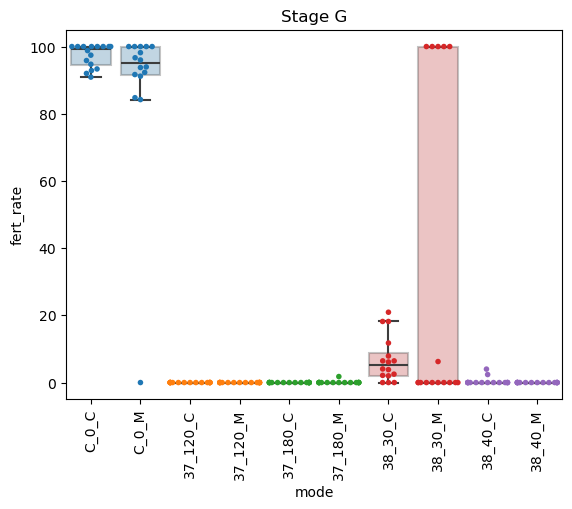

In [50]:
g = sns.boxplot(ex2_23[(ex2_23['STAGE'] == 'G')], 
            x='mode', 
            y='fert_rate',
            hue='regime', hue_order=['C_0', '37_120', '37_180', '38_30', '38_40'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['C_0_С', 'C_0_M', '37_120_С', '37_120_M', '37_180_С', 
                   '37_180_M', '38_30_С', '38_30_M', '38_40_С', '38_40_M'])

g = sns.swarmplot(ex2_23[(ex2_23['STAGE'] == 'G')], 
            x='mode', 
            y='fert_rate',
            hue='regime', hue_order=['C_0', '37_120', '37_180', '38_30', '38_40'],
            dodge=False, size=4,
            order=['C_0_С', 'C_0_M', '37_120_С', '37_120_M', '37_180_С', 
                   '37_180_M', '38_30_С', '38_30_M', '38_40_С', '38_40_M'])

g.get_legend().set_visible(False)
g.set(title='Stage G')
plt.xticks(rotation=90)
plt.show()

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


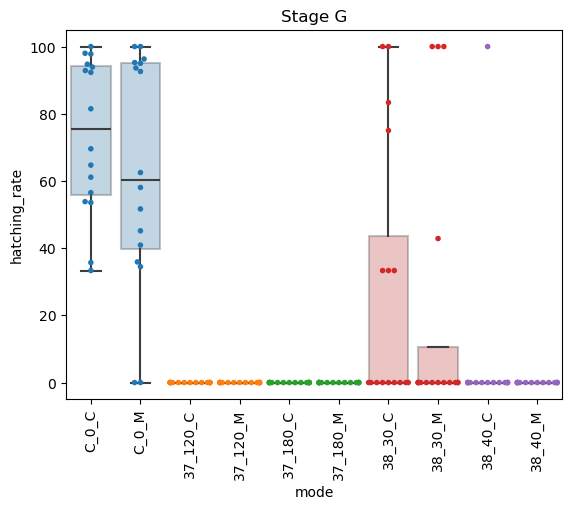

In [51]:
g = sns.boxplot(ex2_23[(ex2_23['STAGE'] == 'G')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['C_0', '37_120', '37_180', '38_30', '38_40'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['C_0_С', 'C_0_M', '37_120_С', '37_120_M', '37_180_С', 
                   '37_180_M', '38_30_С', '38_30_M', '38_40_С', '38_40_M'])

g = sns.swarmplot(ex2_23[(ex2_23['STAGE'] == 'G')], 
            x='mode', 
            y='hatching_rate',
            hue='regime', hue_order=['C_0', '37_120', '37_180', '38_30', '38_40'],
            dodge=False, size=4,
            order=['C_0_С', 'C_0_M', '37_120_С', '37_120_M', '37_180_С', 
                   '37_180_M', '38_30_С', '38_30_M', '38_40_С', '38_40_M'])

g.get_legend().set_visible(False)
g.set(title='Stage G')
plt.xticks(rotation=90)
plt.show()

### ????Experiment 4 2023

In [52]:
ex4_23

,№,CODE,CUP_NUMBER,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,SHOCK_DEAD,SHOCK_ALIVE,SHOCK_NAME,HATCHED_DEAD,HATCHED_ALIVE,HATCHED_NAME
0,1,BC,1,C,NaN,15,44,Dima,59,1,44,Lera,1,41,Lera
1,2,BC,2,C,NaN,13,48,Dima,61,0,60,Lera,0,59,Lera
2,3,BC,3,C,NaN,20,55,Dima,75,1,57,Lera,1,52,Lera
3,4,BC,4,C,NaN,13,51,Dima,64,0,52,Lera,0,46,Lera
4,5,BC,5,C,NaN,24,45,Dima,69,1,45,Lera,1,39,Lera
5,6,B3820,1,38,20.0,20,63,Sasha,83,33,35,Lera,1,24,Lera
6,7,B3820,2,38,20.0,8,87,Sasha,95,1,84,Lera,0,83,Lera
7,8,B3820,3,38,20.0,13,37,Vika,50,0,37,Lera,0,35,Lera
8,9,B3820,4,38,20.0,12,26,Vika,38,1,20,Lera,1,20,Lera
9,10,B3820,5,38,20.0,17,43,Vika,60,0,42,Lera,0,39,Lera


In [53]:
ex4_23['TIME'] = ex4_23['TIME'].fillna(0)

In [54]:
ex4_23['hatching_rate'] = (ex4_23['HATCHED_ALIVE']/ex4_23['SHOCK_ALIVE'])*100

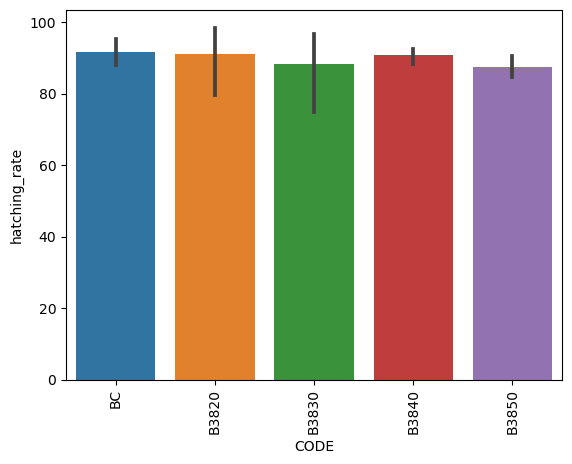

In [55]:
g = sns.barplot(ex4_23, 
            x='CODE', 
            y='hatching_rate',
            dodge=False)


g.set(title='')
plt.xticks(rotation=90)
plt.show()

### Experiment 6 2023

In [56]:
ex6_23

,№,CODE,CUP_NUMBER,DEAD,FERT,FERT_NAME,TOTAL,HATCHED_DEAD,HATCHED_ALIVE,HATCHED_NAME,SWIM,SWIM_NAME
0,1,1C,1,11,13,Sasha,24,5,8,Sasha,4,Vika
1,2,1C,2,74,15,Sasha,89,3,12,Sasha,8,Vika
2,3,1C,3,62,43,Sasha,105,10,33,Sasha,23,Vika
3,4,1C,4,65,18,Sasha,83,6,12,Sasha,12,Vika
4,5,2C,1,53,11,Sasha,64,1,10,Sasha,6,Vika
...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,7M,4,54,72,Vika,126,4,68,Sasha,51,Sasha
60,61,8M,1,89,54,Vika,143,8,46,Sasha,38,Sasha
61,62,8M,2,56,83,Vika,139,13,70,Sasha,62,Sasha
62,63,8M,3,110,46,Vika,156,3,43,Sasha,32,Sasha


In [67]:
ex6_23['hatching_rate'] = (ex6_23['HATCHED_ALIVE']/ex6_23['FERT'])*100

In [68]:
ex6_23['fert_rate'] = (ex6_23['FERT']/ex6_23['TOTAL'])*100

In [69]:
ex6_23 = ex6_23.fillna(0)

In [70]:
ex6_23['CODE'] = ex6_23['CODE'].str.replace('G', '')

In [71]:
ex6_23.loc[67, 'CODE'] = 'CM'
ex6_23.loc[68, 'CODE'] = 'CM'
ex6_23.loc[69, 'CODE'] = 'CM'

In [72]:
ex6_23['CODE'].unique()

array(['1C', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '1M', '2M', '3M',
       '4M', '5M', '6M', '7M', '8M', 'CC', 'CM'], dtype=object)

In [73]:
ex6_23['medium'] = ex6_23['CODE'].str[0]

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


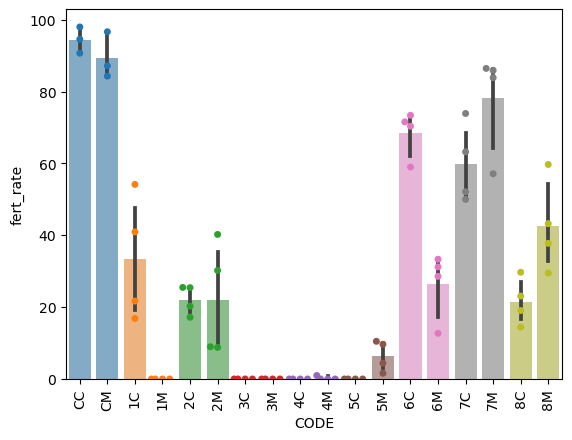

In [74]:
g = sns.barplot(ex6_23, 
            x='CODE', 
            y='fert_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False, alpha=0.6,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g = sns.swarmplot(ex6_23, 
            x='CODE', 
            y='fert_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g.get_legend().set_visible(False)
g.set(title='')
plt.xticks(rotation=90)
plt.show()

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


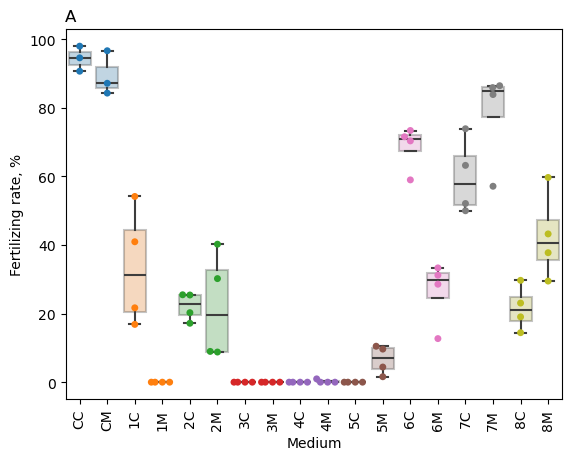

In [75]:
g = sns.boxplot(ex6_23, 
            x='CODE', 
            y='fert_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g = sns.swarmplot(ex6_23, 
            x='CODE', 
            y='fert_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g.get_legend().set_visible(False)
g.set_title('A', x=0.01, y=1)
plt.xticks(rotation=90)
plt.xlabel('Medium')
plt.ylabel('Fertilizing rate, %')
plt.show()

In [76]:
scipy.stats.f_oneway(ex6_23[ex6_23['CODE'] == 'CC']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '1C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '2C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '3C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '4C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '5C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '6C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '7C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '8C']['fert_rate'])

F_onewayResult(statistic=67.76898554177124, pvalue=1.89776236160948e-15)

In [77]:
print(scipy.stats.tukey_hsd(ex6_23[ex6_23['CODE'] == 'CC']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '1C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '2C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '3C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '4C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '5C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '6C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '7C']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '8C']['fert_rate']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     61.016     0.000    40.825    81.207
 (0 - 2)     72.338     0.000    52.147    92.529
 (0 - 3)     94.431     0.000    74.240   114.622
 (0 - 4)     94.431     0.000    74.240   114.622
 (0 - 5)     94.431     0.000    74.240   114.622
 (0 - 6)     25.842     0.005     5.651    46.034
 (0 - 7)     34.616     0.000    14.424    54.807
 (0 - 8)     72.866     0.000    52.674    93.057
 (1 - 0)    -61.016     0.000   -81.207   -40.825
 (1 - 2)     11.322     0.529    -7.371    30.015
 (1 - 3)     33.415     0.000    14.722    52.108
 (1 - 4)     33.415     0.000    14.722    52.108
 (1 - 5)     33.415     0.000    14.722    52.108
 (1 - 6)    -35.173     0.000   -53.867   -16.480
 (1 - 7)    -26.400     0.002   -45.094    -7.707
 (1 - 8)     11.850     0.470    -6.844    30.543
 (2 - 0)    -72.338     0.000   -92.529   -52.147
 (2 - 1)    -11.322     0.529   

In [78]:
print(scipy.stats.tukey_hsd(ex6_23[ex6_23['CODE'] == 'CM']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '1M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '2M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '3M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '4M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '5M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '6M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '7M']['fert_rate'],
                    ex6_23[ex6_23['CODE'] == '8M']['fert_rate']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     89.387     0.000    65.468   113.305
 (0 - 2)     67.332     0.000    43.414    91.250
 (0 - 3)     89.387     0.000    65.468   113.305
 (0 - 4)     89.146     0.000    65.228   113.064
 (0 - 5)     82.854     0.000    58.935   106.772
 (0 - 6)     62.932     0.000    39.014    86.851
 (0 - 7)     11.032     0.818   -12.886    34.951
 (0 - 8)     46.835     0.000    22.917    70.754
 (1 - 0)    -89.387     0.000  -113.305   -65.468
 (1 - 2)    -22.054     0.052   -44.198     0.089
 (1 - 3)      0.000     1.000   -22.144    22.144
 (1 - 4)     -0.240     1.000   -22.384    21.904
 (1 - 5)     -6.533     0.983   -28.677    15.611
 (1 - 6)    -26.454     0.011   -48.598    -4.310
 (1 - 7)    -78.354     0.000  -100.498   -56.210
 (1 - 8)    -42.551     0.000   -64.695   -20.407
 (2 - 0)    -67.332     0.000   -91.250   -43.414
 (2 - 1)     22.054     0.052   

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


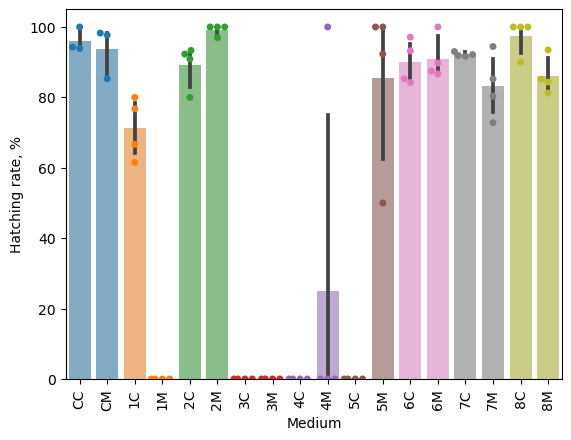

In [79]:
g = sns.barplot(ex6_23, 
            x='CODE', 
            y='hatching_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False, alpha=0.6,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g = sns.swarmplot(ex6_23, 
            x='CODE', 
            y='hatching_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g.get_legend().set_visible(False)
g.set(title='')
plt.xticks(rotation=90)
plt.xlabel('Medium')
plt.ylabel('Hatching rate, %')
plt.show()

C:\Users\777\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


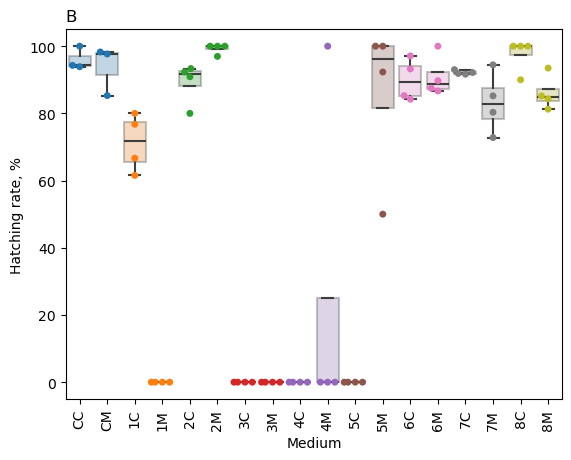

In [80]:
g = sns.boxplot(ex6_23, 
            x='CODE', 
            y='hatching_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False, boxprops=dict(alpha=.3), showfliers=False,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g = sns.swarmplot(ex6_23, 
            x='CODE', 
            y='hatching_rate',
            hue='medium', hue_order=['C', '1', '2', '3', '4', '5', '6', '7', '8'],
            dodge=False,
            order=['CC', 'CM', '1C', '1M', '2C', '2M', '3C', '3M', 
                   '4C', '4M', '5C', '5M', '6C', '6M', '7C', '7M', '8C', '8M'])

g.get_legend().set_visible(False)
g.set_title('B', x=0.01, y=1)
plt.xticks(rotation=90)
plt.xlabel('Medium')
plt.ylabel('Hatching rate, %')
plt.show()

In [81]:
print(scipy.stats.tukey_hsd(ex6_23[ex6_23['CODE'] == 'CC']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '1C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '2C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '3C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '4C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '5C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '6C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '7C']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '8C']['hatching_rate']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     24.817     0.000    12.936    36.698
 (0 - 2)      6.917     0.579    -4.964    18.798
 (0 - 3)     96.054     0.000    84.173   107.936
 (0 - 4)     96.054     0.000    84.173   107.936
 (0 - 5)     96.054     0.000    84.173   107.936
 (0 - 6)      6.098     0.722    -5.783    17.979
 (0 - 7)      3.870     0.969    -8.012    15.751
 (0 - 8)     -1.446     1.000   -13.327    10.436
 (1 - 0)    -24.817     0.000   -36.698   -12.936
 (1 - 2)    -17.900     0.000   -28.900    -6.900
 (1 - 3)     71.237     0.000    60.237    82.237
 (1 - 4)     71.237     0.000    60.237    82.237
 (1 - 5)     71.237     0.000    60.237    82.237
 (1 - 6)    -18.719     0.000   -29.719    -7.719
 (1 - 7)    -20.947     0.000   -31.947    -9.947
 (1 - 8)    -26.263     0.000   -37.263   -15.263
 (2 - 0)     -6.917     0.579   -18.798     4.964
 (2 - 1)     17.900     0.000   

In [82]:
print(scipy.stats.tukey_hsd(ex6_23[ex6_23['CODE'] == 'CM']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '1M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '2M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '3M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '4M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '5M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '6M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '7M']['hatching_rate'],
                    ex6_23[ex6_23['CODE'] == '8M']['hatching_rate']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     93.748     0.000    43.742   143.755
 (0 - 2)     -5.494     1.000   -55.501    44.512
 (0 - 3)     93.748     0.000    43.742   143.755
 (0 - 4)     68.748     0.002    18.742   118.755
 (0 - 5)      8.171     1.000   -41.835    58.178
 (0 - 6)      2.771     1.000   -47.236    52.777
 (0 - 7)     10.551     0.998   -39.456    60.557
 (0 - 8)      7.685     1.000   -42.321    57.692
 (1 - 0)    -93.748     0.000  -143.755   -43.742
 (1 - 2)    -99.242     0.000  -145.539   -52.945
 (1 - 3)      0.000     1.000   -46.297    46.297
 (1 - 4)    -25.000     0.668   -71.297    21.297
 (1 - 5)    -85.577     0.000  -131.874   -39.280
 (1 - 6)    -90.978     0.000  -137.275   -44.681
 (1 - 7)    -83.197     0.000  -129.494   -36.900
 (1 - 8)    -86.063     0.000  -132.360   -39.766
 (2 - 0)      5.494     1.000   -44.512    55.501
 (2 - 1)     99.242     0.000   